# Lending Club Cedit Decision Model Using Tensorflow2

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We will create feature information on the data for easy lookup throughout this notebook using the funtion called feat_info:

In [2]:
import pandas as pd

In [3]:
data_info = pd.read_csv('./DATA/lending_club_info.csv',index_col='LoanStatNew')

In [4]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
def feat_info(col_name):
    """This Function will describe the column from our dataframe"""
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on some version of Jupyter
%matplotlib inline

In [8]:
df = pd.read_csv('./DATA/lending_club_loan_two.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

# Project Tasks

** The project has been divided into 4 Section **

 1) Exploratory Data Analysis 
<br>
 2) Preprocessing  and Feature Engenering 
<br>
 3) Builting Model Using Tensorflow2
<br>
 4) Analying Models Metrices / Results



# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**Since we will be attempting to predict loan_status, let us start by creating a countplot of loan_status target variable.**

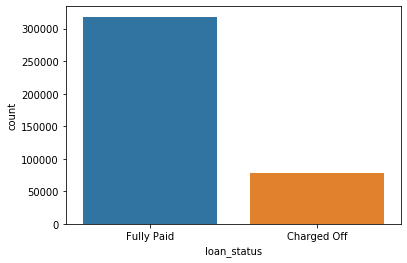

In [10]:
sns.countplot(df.loan_status)

**Looking at the chart we can tell that out dataset is impalanced meaning that we have a lot more entries of people that fully pay off their loans than we have people that did not pay back.**

**Now let us create a histogram of the loan_amnt column s.**

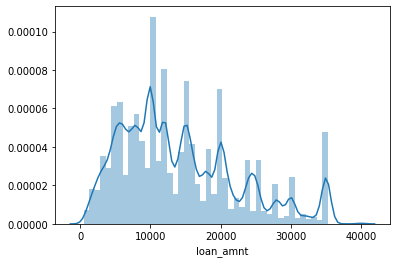

In [11]:
sns.distplot(df.loan_amnt)

**Looks like most of people are applying loan between 5k to 45k , also we see the spikes on even amount like 10k ,12k ,20k and so on.It makes sense as most of people apply loan for that amount**

**Let's explore correlation between the continuous feature variables. This can be done by using .corr method on our dataframe.**

In [12]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<br>


**For better understanding we can visualize this corelation or continous variables using a heatmap.**


(10, 0)

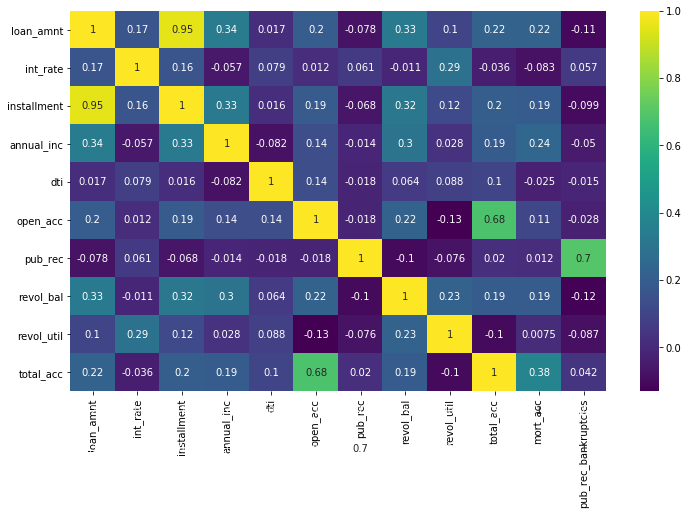

In [13]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

**We see almost perfect correlation with the "installment" and "loan_amnt" feature. We will explore this feature further.We always make sure that there's not a single feature that is a perfect predictor of the label because that basically indicates that it's not really a feature it's probably just some duplicate information that's very similar to the label.**

**Let's try printing out descriptions of "installment" and "loan_amnt" feature and perform a scatterplot between them.**

In [14]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [15]:
feat_info("loan_amnt")

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


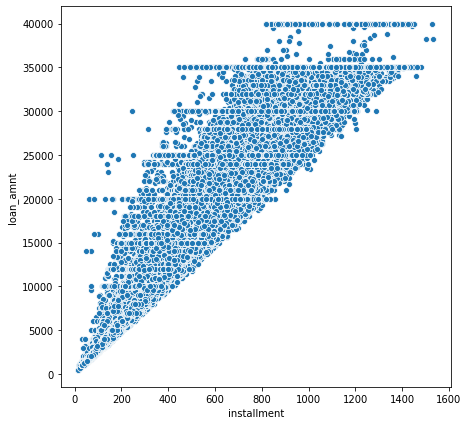

In [16]:
plt.figure(figsize=(7,7))
sns.scatterplot("installment","loan_amnt",data=df)

**Let's further explore our features using  a boxplot, showing the relationship between the loan_status and the Loan Amount.**
<br>
**Here is the question that came on my mind. Is there a relationship between really expensive loans and not being able to pay them off or very low amount and then fully paying those off?** 

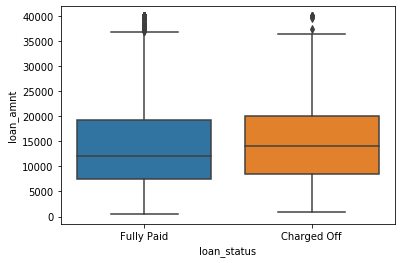

In [17]:
sns.boxplot(x="loan_status",y="loan_amnt",data=df)

**There is not really significant different based on loan amount however on average if our loan amount is higher we have a slight in the liklihoood of it being charged off which again intuitively makes sense.**
<br>
<br>

**Now let's calculate the summary statistics for the loan amount,and group it by the loan_status.**

In [18]:
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**The charged off average(15126.3) price is slightly higher(13866.8) than fully paid.**
<br>
<br>

**Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans.**

In [19]:
sorted(df.grade.unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [20]:
sorted(df.sub_grade.unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**We have 7 unique grades , which are further divided into 5 sub_grades from 1 to 5**

**Now let us create a Barchart per grade having loan_status as label.**

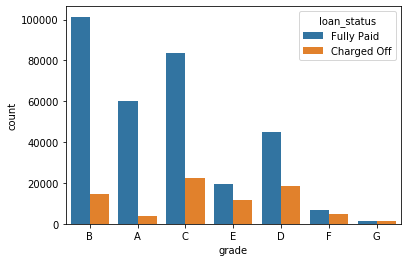

In [21]:
sns.countplot(df.grade,hue="loan_status",data=df)

**Let us plot the distribution according to grade and subgrade, and use the loan status as legend**

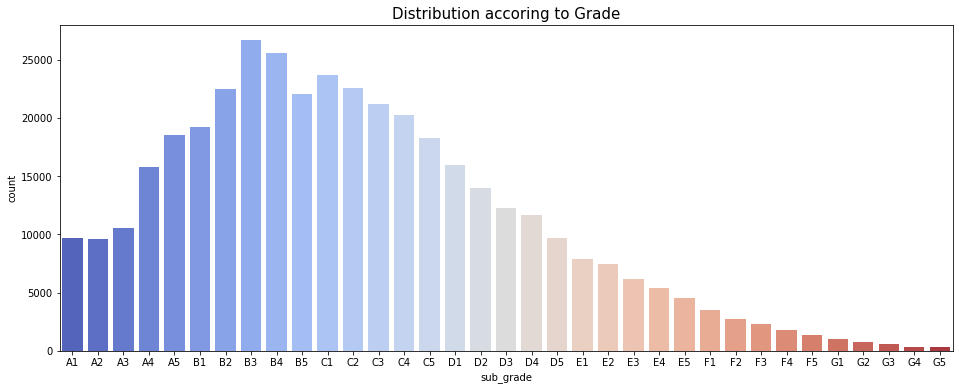

In [22]:
plt.figure(figsize=(16,6))
sns.countplot(df.sub_grade,data=df,order=sorted(df.sub_grade.unique()),palette="coolwarm")
plt.title("Distribution accoring to Grade",fontdict={"size":15})
plt.show()

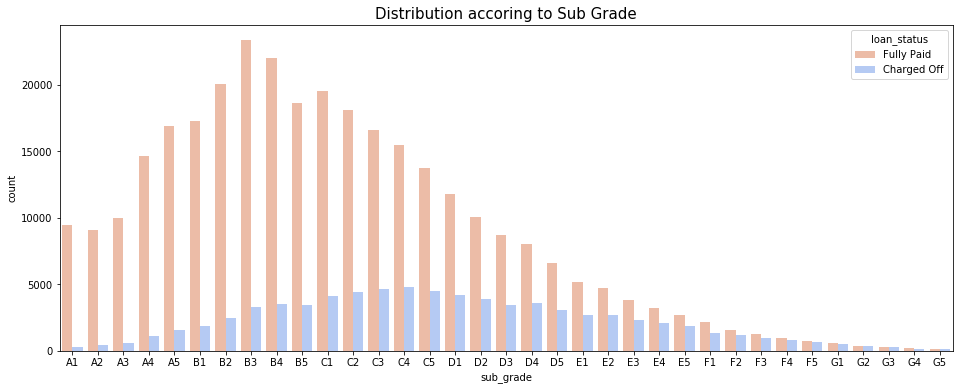

In [23]:
plt.figure(figsize=(16,6))
sns.countplot(df.sub_grade,data=df,order=sorted(df.sub_grade.unique()),palette="coolwarm_r",hue="loan_status")
plt.title("Distribution accoring to Sub Grade",fontdict={"size":15})
plt.show()

**It looks like F and G subgrades don't get paid back that often.  Let us isolate these two grade and recreate the countplot just for those subgrades and see if we can find and interesting pattern here.**

In [24]:
f_and_g=df[(df.grade=="F")| (df.grade=="G")]

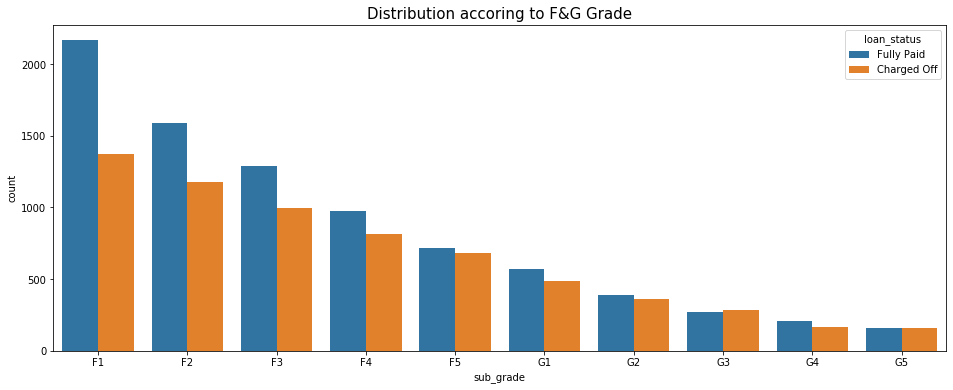

In [25]:
plt.figure(figsize=(16,6))
sns.countplot(f_and_g.sub_grade,data=f_and_g,order=sorted(f_and_g.sub_grade.unique()),
              hue="loan_status")
plt.title("Distribution accoring to F&G Grade",fontdict={"size":15})
plt.show()

**The chart shows as we shift towards upper grade from A to G , customers are most likely to 
charged off their loan.Customers in group G3 and G5 are very risky ,the fully paid rate is about only 50%**
<br>
<br>

**Let us create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off. This is needed in order to build any model as computers understand numbers.We will also drop loan_status column and make loan_reapid as out target variable.**

In [26]:
df["loan_repaid"]=df.loan_status.map({'Fully Paid':1,'Charged Off':0})

In [27]:
df[["loan_repaid","loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [28]:
df.drop(columns="loan_status",axis=1,inplace=True)# Dropping loan_status column , it's just a duplicat column.

**Let us try creating a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

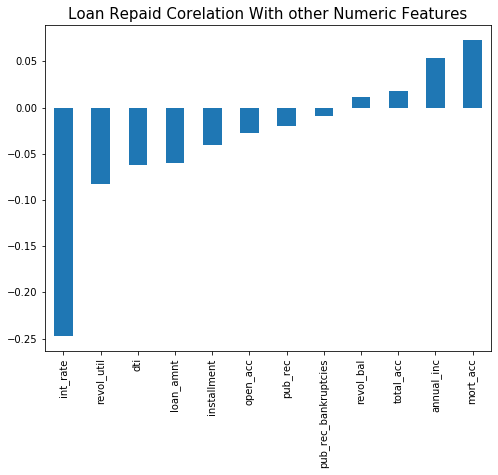

In [29]:
plt.figure(figsize=(8,6))
df.corr()["loan_repaid"].sort_values().iloc[:-1].plot(kind="bar")
plt.title("Loan Repaid Corelation With other Numeric Features",fontdict={"size":15})
plt.show()

**The int_rate has the highest negative correlation with whether or not someone's going to repay their loan which makes sense in real life. Maybe if you have a extremely high interest rate you're going to find it harder to pay off that loan.**

---
---
# Section 2: Data PreProcessing and Feature Engenering
---
---
**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



## Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [30]:
print(f"We have {df.shape[0]} and {df.shape[1]} columns")

We have 396030 and 27 columns


**Let us create a Series that displays the total count of missing values per column in descending order.**

In [31]:
df.isna().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
issue_d                     0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
loan_repaid                 0
purpose                     0
address                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
loan_amnt                   0
dtype: int64

**It would make more sense to see this Series in term of percentage of the total DataFrame**

In [32]:
df.isna().sum().sort_values(ascending=False)/len(df)*100

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
issue_d                 0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_repaid             0.000000
purpose                 0.000000
address                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
loan_amnt               0.000000
dtype: float64

**Looks like mort_acc , emp_title and emp_length has significant amount of missing data. i.e more than 4% of data. Let's examine mort_acc,emp_title and emp_length to see whether it will be okay to drop them.  Let us print out their feature information using the feat_info() function from the top of this notebook.**

In [33]:
feat_info('mort_acc')
print('\n')
feat_info('emp_title')
print('\n')
feat_info('emp_length')

Number of mortgage accounts.


The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


### Handling mort_acc column

In [34]:
df.mort_acc.nunique() # There are 34 uniques values , majority of people have 0 mortgage while some of them even have 34 mortgages.

33

In [35]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

##### There are 34 unique values , majority of people have 0 mortgage while some of them even have 34 mortgages.

**There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

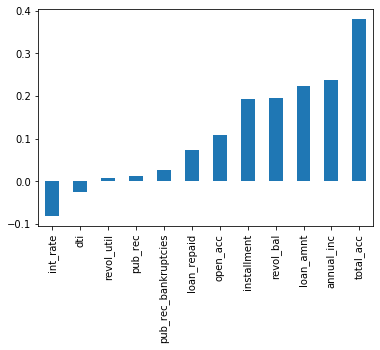

In [36]:
df.corr()['mort_acc'].sort_values().drop("mort_acc").plot(kind="bar")

**Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [37]:
print("Mean of mort_acc column per total_acc")
df.groupby("total_acc")["mort_acc"].mean()


Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [38]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg[3.0]

0.05202312138728324

In [39]:
df[["mort_acc","total_acc"]]

,mort_acc,total_acc
0,0.0,25.0
1,3.0,27.0
2,0.0,26.0
3,0.0,13.0
4,1.0,43.0
...,...,...
396025,0.0,23.0
396026,1.0,8.0
396027,0.0,23.0
396028,5.0,20.0


In [40]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [41]:
df.apply(lambda x: fill_mort_acc(x["total_acc"],x["mort_acc"]),axis=1)

0         0.000000
1         3.000000
2         0.000000
3         0.000000
4         1.000000
            ...   
396025    0.000000
396026    1.000000
396027    0.000000
396028    5.000000
396029    1.358013
Length: 396030, dtype: float64

Now let us reassign mort_acc with this values

In [42]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

### Handling emp_title column

In [43]:
df.mort_acc.nunique()

110

In [44]:
df['emp_title'].value_counts()

Teacher                 4389
Manager                 4250
Registered Nurse        1856
RN                      1846
Supervisor              1830
                        ... 
medicab of rochester       1
Metallographer             1
bab bedding                1
Pencor Services, Inc       1
Lead Line Mechanic         1
Name: emp_title, Length: 173105, dtype: int64

**There are 110 uniques Job titles. Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [45]:
df.drop(columns="emp_title",axis=1,inplace=True)

### Handling emp_length column

In [46]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [47]:
df.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [48]:
sorted(df.emp_length.dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [49]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

**Let us create a count plot of the emp_length feature column.**

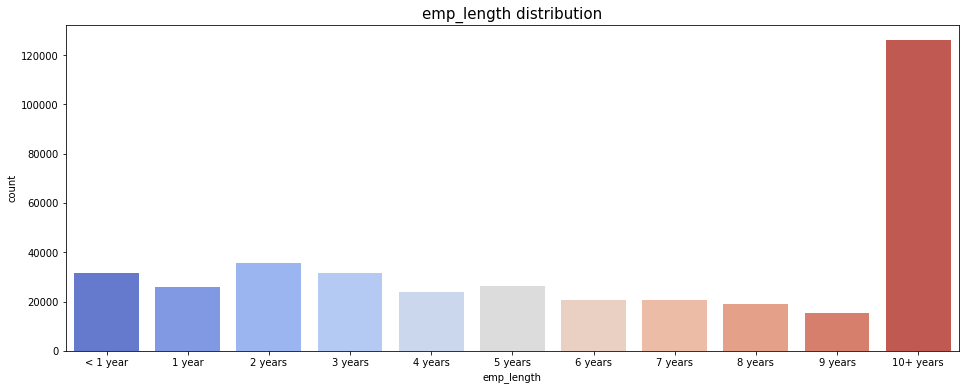

In [50]:
plt.figure(figsize=(16,6))
sns.countplot(df.emp_length,data=df,order=emp_length_order,palette="coolwarm")
plt.title("emp_length distribution",fontdict={"size":15})
plt.show()

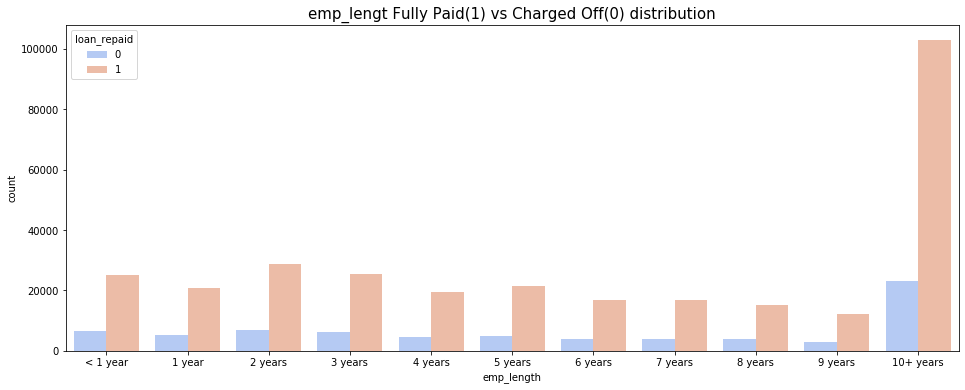

In [51]:
plt.figure(figsize=(16,6))
sns.countplot(df.emp_length,data=df,order=emp_length_order,
              palette="coolwarm",
             hue="loan_repaid")
plt.title("emp_lengt Fully Paid(1) vs Charged Off(0) distribution",fontdict={"size":15})
plt.show()

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series and visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html).**

In [52]:
df.groupby("emp_length")["loan_repaid"].count()

emp_length
1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: loan_repaid, dtype: int64

In [53]:
emp_charged_off=df[df["loan_repaid"]==0].groupby("emp_length")["loan_repaid"].count()

In [54]:
emp_fully_paid=df[df["loan_repaid"]==1].groupby("emp_length")["loan_repaid"].count()

In [55]:
emp_len=emp_charged_off/emp_fully_paid*100

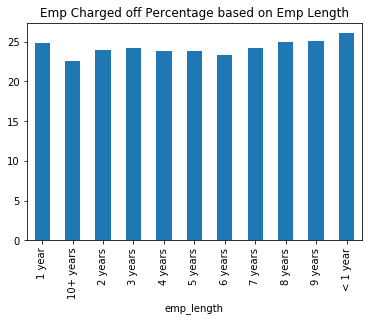

In [56]:
emp_len.plot(kind="bar",title="Emp Charged off Percentage based on Emp Length")

**Charge off rates are extremely similar across all employment lengths so we will drop the emp_length column.**

In [57]:
df.drop(columns="emp_length",axis=1,inplace=True)

**Let us revisit the DataFrame to see what feature columns still have missing data.**

In [58]:
df.isna().sum().sort_values(ascending=False)

title                   1755
pub_rec_bankruptcies     535
revol_util               276
loan_repaid                0
purpose                    0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
dti                        0
address                    0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                   0
loan_amnt                  0
dtype: int64

**Let us review the title column vs the purpose column. Looking at the descripthon this looks repeated information**

In [59]:
df["purpose"].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [60]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [61]:
print(feat_info("title"))

The loan title provided by the borrower
None


In [62]:
print(feat_info("purpose"))

A category provided by the borrower for the loan request. 
None


**The title column is simply a string subcategory/description of the purpose column. So we can use pirpose column and drop the title column.**

In [63]:
df.drop(columns="title",axis=1,inplace=True)

**Handling "pub_rec_bankruptcies" and " "revol_util" columns**
<br>
<br>

In [64]:
df.isna().sum().sort_values(ascending=False)/len(df)*100

pub_rec_bankruptcies    0.135091
revol_util              0.069692
loan_repaid             0.000000
purpose                 0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
dti                     0.000000
address                 0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
loan_amnt               0.000000
dtype: float64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. So we will trop the rows that has missing values for these two columns**

In [65]:
df.shape # shape before dropping 

(396030, 24)

In [66]:
df.dropna(inplace=True)

In [67]:
df.shape # shape after droping rows 

(395219, 24)

**Let us revisit the DataFrame to see what feature columns still have missing data.**
<br>

In [68]:
df.isna().sum().sort_values(ascending=False)

loan_repaid             0
address                 0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
loan_amnt               0
dtype: int64

**We have successfully resolved or removed all the missing values or  columns at this point from our dataframe.**

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [69]:
df.select_dtypes(include=["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### Handling "term feature" column



In [70]:
df.term.value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

**Converting the term feature 36months , 60 months into a 36 or 60 integer numeric data type using .map() method.**

In [71]:
df.term.head().values

array([' 36 months', ' 36 months', ' 36 months', ' 36 months',
       ' 60 months'], dtype=object)

In [72]:
df["term"]=df.term.map({' 36 months':36,' 60 months':60})

### Handling  "grade feature" Column

**We already know grade is part of sub_grade, so we will just drop the grade feature.**

In [73]:
df.drop(columns="grade",axis=1,inplace=True)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [76]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid'],
      dtype='object')

In [78]:
dummy_sub_grades=pd.get_dummies(df.sub_grade,drop_first=True) # creating dummies variable and droping first A1 column.

df = pd.concat([df.drop('sub_grade',axis=1),dummy_sub_grades],axis=1) # we are droping sub_grade column and concatingg dummy_sub_grades to our original df.

In [82]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [83]:
df.select_dtypes(include=["object"]).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

## handling verification_status, application_type,initial_list_status,purpose columns

In [86]:
df.verification_status.value_counts() # Has only three catagories 

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [87]:
df.application_type.value_counts() # Has only three catagories 

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [88]:
df.initial_list_status.value_counts() # Has only two catagories 

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [89]:
df.purpose.value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

 **'verification_status', 'application_type','initial_list_status','purpose' has few catagories so it makes sense to 
 create dummy variables with this columns** 


**Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Also droping the original columns .**

In [90]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [91]:
df.select_dtypes(include=["object"]).columns

Index(['home_ownership', 'issue_d', 'earliest_cr_line', 'address'], dtype='object')

**There are still four columns with string values**

###  Handling home_ownership

In [95]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**We only have 29 and 3 people in none and any catagories , so we will just add them to other catagorie so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER.And convert these 4 catagoires into dummmy variable.**

In [99]:
df["home_ownership"]=df["home_ownership"].replace(["NONE","ANY"],"OTHER")

In [101]:
df.home_ownership.value_counts() # we have replaced NONE and ANY with OTHERS

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

**Creating Dummy varaiables for home_ownership column**

In [103]:
dummy_home=pd.get_dummies(df.home_ownership,drop_first=True) # creating dummies variable and droping first column.

df = pd.concat([df.drop('home_ownership',axis=1),dummy_home],axis=1) # we are droping home_ownership column and concatingg dummy_home to our original df.

In [104]:
df.select_dtypes(include=["object"]).columns

Index(['issue_d', 'earliest_cr_line', 'address'], dtype='object')

### Handling address column

In [105]:
df.address.value_counts()

USCGC Smith\r\nFPO AE 70466                                 8
USS Johnson\r\nFPO AE 48052                                 8
USS Smith\r\nFPO AP 70466                                   8
USNS Johnson\r\nFPO AE 05113                                8
USNS Johnson\r\nFPO AP 48052                                7
                                                           ..
80614 Timothy Bypass Apt. 209\r\nLake Amanda, IN 22690      1
PSC 7558, Box 3761\r\nAPO AA 30723                          1
476 Cortez Motorway Apt. 754\r\nLake Ryan, ID 30723         1
0068 Savannah Greens Suite 728\r\nPatrickmouth, OH 22690    1
8209 Robinson Ports\r\nDavidview, MT 30723                  1
Name: address, Length: 392898, dtype: int64

**All of the address are different so we we cannot really use it as it is but let us try just by extracting the zipcode,so that 
we can catagorize the address based on zipcodes(this will reduce the address into fewer catagories.**


**Let's feature engineer a zip code column from the address in the data set. We will create a column called 'zip_code' that extracts the zip code from the address column.**

In [113]:
df["zip_code"]=df.address.apply(lambda x: x[-5:])

In [114]:
df[["address","zip_code"]]

,address,zip_code
0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",22690
1,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",05113
2,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",05113
3,"823 Reid Ford\r\nDelacruzside, MA 00813",00813
4,"679 Luna Roads\r\nGreggshire, VA 11650",11650
...,...,...
396025,"12951 Williams Crossing\r\nJohnnyville, DC 30723",30723
396026,"0114 Fowler Field Suite 028\r\nRachelborough, ...",05113
396027,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",70466
396028,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",29597


In [118]:
df.zip_code.nunique()

10

**Looks good we only have 10 different zip codes, Now let's make this zip_code column into dummy variable and concatenate the result and drop the original zip_code column along with dropping the address column.**

In [119]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

###  Handling issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, so we will drop this feature.**

In [121]:
df.drop(columns="issue_d",axis=1,inplace=True)

<br>

### Handling  'earliest_cr_line' column

In [125]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [126]:
df.earliest_cr_line.head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object


**This appears to be a historical time stamp feature. WE WILL Extract the year from this feature using a .apply function, then convert it to a numeric feature And set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line column.**

In [129]:
df["earliest_cr_year"]=df.earliest_cr_line.apply(lambda year: year[-4:])

In [135]:
df["earliest_cr_year"]=df.earliest_cr_year.astype("int") # year was parsed as string , so converting it as intiger

In [139]:
df.drop(columns="earliest_cr_line",axis=1,inplace=True)

In [146]:
df.shape

(395219, 79)

**This Concludes section 2 as all of our data in in numeric form , our colums has expanded from 27 to 79 with the newly added duummy variable columns.** 

## Train Test Split And Normalarizg Our Data 

**We will start by Seperating our Features(X) and Labels(y) from our dataframe then split our data into training and testing sets**

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [158]:
X=df.drop(columns="loan_repaid",axis=1).values  # features
y=df.loan_repaid.values # Labels

**Performing a train/test split with test_size=0.2 and a random_state of 70(arbitrary choosen number).**

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=70)

## Normalizing the Data

**We will use a MinMaxScaler to normalize the feature data X_train and X_test.We don't want data leakge from the test set so we only fit on the X_train data.**

In [164]:
scalar=MinMaxScaler()

In [165]:
X_train=scalar.fit_transform(X_train)

In [166]:
X_test= scalar.transform(X_test)

# Section3: Builting Model Using Tensorflow2


In [167]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import save_model,load_model

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [168]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()

In [172]:
model.add(Dense(78,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(39,activation="relu"))
model.add(Dropout(0.2))
          
model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))
          
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])



**Let us fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. We will also we batch_size of 256.**

In [173]:
model.fit(X_train,y_train,
          batch_size=256,
          verbose=1,
          epochs=25,
          validation_data=(X_test,y_test)  
         )

Train on 264796 samples, validate on 130423 samples
Epoch 1/25
264796/264796 [==============================] - 6s 24us/sample - loss: 0.3589 - accuracy: 0.8615 - val_loss: 0.3060 - val_accuracy: 0.8874
Epoch 2/25
264796/264796 [==============================] - 5s 18us/sample - loss: 0.3058 - accuracy: 0.8868 - val_loss: 0.2906 - val_accuracy: 0.8874
Epoch 3/25
264796/264796 [==============================] - 5s 17us/sample - loss: 0.2955 - accuracy: 0.8861 - val_loss: 0.2826 - val_accuracy: 0.8875
Epoch 4/25
264796/264796 [==============================] - 5s 19us/sample - loss: 0.2921 - accuracy: 0.8842 - val_loss: 0.2783 - val_accuracy: 0.8867
Epoch 5/25
264796/264796 [==============================] - 5s 18us/sample - loss: 0.2905 - accuracy: 0.8832 - val_loss: 0.2758 - val_accuracy: 0.8875
Epoch 6/25
264796/264796 [==============================] - 5s 18us/sample - loss: 0.2899 - accuracy: 0.8823 - val_loss: 0.2749 - val_accuracy: 0.8875
Epoch 7/25
264796/264796 [================

**Saving the model.**

In [174]:
model.save("First_model_val8828.h5")

# Section 3: Evaluating Model Performance.

**Plotingt the validation loss versus the training loss.**

In [179]:
history=pd.DataFrame(model.history.history)
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.358867,0.861505,0.306049,0.887374
1,0.305813,0.886815,0.290643,0.887382
2,0.295511,0.886059,0.282576,0.887505
3,0.292052,0.884201,0.278303,0.886653
4,0.290545,0.883174,0.275756,0.887474


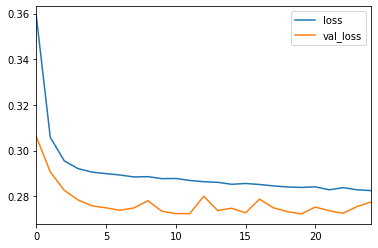

In [181]:
history[["loss","val_loss"]].plot()

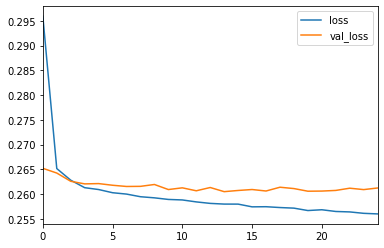

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [140]:
# CODE HERE

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



array([[ 6850,  8808],
       [  100, 63286]], dtype=int64)

**TASK: Given the customer below, would you offer this person a loan?**

In [145]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                    6.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [146]:
# CODE HERE

array([[1]])

**TASK: Now check, did this person actually end up paying back their loan?**

In [148]:
# CODE HERE

1.0